In [2]:
import geojson
from descartes import PolygonPatch
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import mpl_toolkits
import numpy as np
 
with open("ged191.geojson") as json_file:
    json_data = geojson.load(json_file)

/home/jarvis/anaconda3/envs/rhombus/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

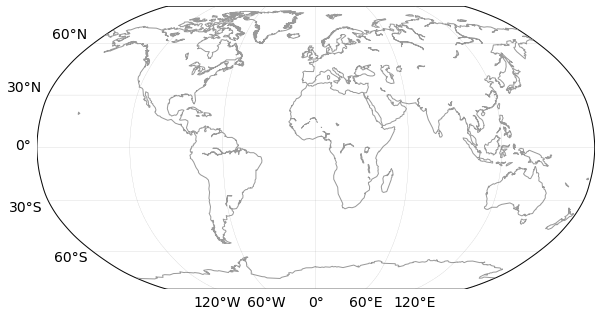

In [3]:
plt.clf()
ax = plt.figure(figsize=(10,10)).add_subplot(111)#fig.gca()
 
m = Basemap(projection='robin', lon_0=0,resolution='c')
m.drawmapboundary(fill_color='white', zorder=-1)
m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawcoastlines(color='0.6', linewidth=1)

In [8]:
for i in range(2799):
    coordlist = json_data.features[i]['geometry']['coordinates'][0]
    if i < 2796:
        name = json_data.features[i]['properties']['type_of_violence']
#         aez =  json_data.features[i]['properties']['AEZ']
 
    print(len(coordlist))
    for j in range(len(coordlist)):
        for k in range(len(coordlist[j])):
            coordlist[j][k][0],coordlist[j][k][1]=m(coordlist[j][k][0],coordlist[j][k][1])
 
    poly = {"type":"Polygon","coordinates":coordlist}#coordlist
    ax.add_patch(PolygonPatch(poly, fc=[0,0.5,0], ec=[0,0.3,0], zorder=0.2 ))
 
ax.axis('scaled')
plt.draw()
plt.show()

TypeError: object of type 'float' has no len()

## Method 2

In [22]:
import geopandas
import geoplot
%matplotlib inline
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

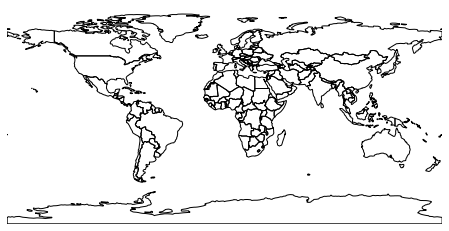

In [5]:
geoplot.polyplot(world, figsize=(8, 4))

In [8]:
data = geopandas.read_file("ged191.geojson")

In [9]:
data.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high,geometry
0,67972,2013,1,1,11347,Mali: Government,12571,Government of Mali - MUJAO,72,432.0,...,2013-01-11,2013-01-12,12,16,3,0,31,31,50,POINT (-3.89474 14.94329)
1,23385,2004,1,3,583,FNI - Civilians,1050,FNI - Civilians,606,NaN,...,2004-01-14,2004-01-16,0,0,200,0,100,200,200,POINT (30.775833 1.769722)
2,24255,2007,0,2,4600,CNDP - PARECO,5210,CNDP - PARECO,426,NaN,...,2007-12-13,2007-12-18,0,0,4,0,4,4,4,POINT (28.876944 -1.651944)
3,82612,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2008-03-04,2008-03-05,0,2,0,0,2,2,2,POINT (74.72548999999999 34.378934)
4,82645,2008,1,1,364,India: Kashmir,792,Government of India - Kashmir insurgents,141,750.0,...,2008-06-30,2008-07-01,1,11,0,0,12,12,12,POINT (74.167293 34.372601)


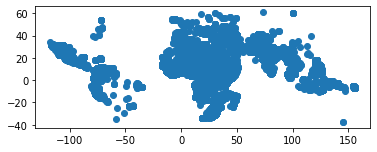

In [10]:
data.plot()

In [28]:
data = data[(data.type_of_violence==1) & (data.year==2001)]

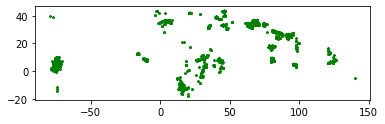

In [29]:
data.plot(marker='*', color='green', markersize=5);
data = data.to_crs(world.crs)

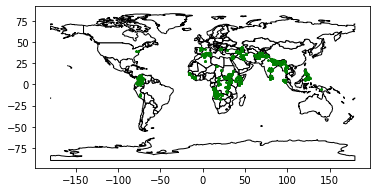

In [30]:
base = world.plot(color='white',edgecolor='black')
data.plot(ax=base, marker='*', color='green', markersize=5, figsize=(20,10))